<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Datencheck" data-toc-modified-id="Datencheck-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Datencheck</a></span></li></ul></div>

# Prüfen der Abstimmungsdaten Grossrat
In diesem Notebook werden die Daten der verschiedenen Abstimmungsanlagen geprüft. 

In [56]:
# Die nötigen Bilbiotheken werden importiert. 
import pandas as pd

In [57]:
# Die Daten werden importiert. 
df = pd.read_csv('daten/be_grossrat_abstimmungen.csv', index_col='Unnamed: 0', low_memory=False)
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].apply(lambda x: x.date())
df = df.reset_index(drop=True)

## Datencheck

In [58]:
# Ein erster Blick auf die Daten. 
df.head()

,nachname,vorname,partei,datetime,geschäftsname,stimme,res_ja,res_nein,res_enthaltung,res_keine_stimme,anlage,dateiname,register,wohnort,wahlkreis,sprache,date
0,Aebi,Markus,SVP,2018-06-04 15:47:00,#2017.RRGR.459_0,ja,137.0,1.0,1.0,NaN,rathaus,Sommersession 2018.xlsx,4.04.2018,Hellsau,Emmental,d,2018-06-04
1,Aebischer,Verena,SVP,2018-06-04 15:47:00,#2017.RRGR.459_0,ja,137.0,1.0,1.0,NaN,rathaus,Sommersession 2018.xlsx,4.04.2018,Guggisberg,Mittelland-Süd,d,2018-06-04
2,Amstutz,Madeleine,SVP,2018-06-04 15:47:00,#2017.RRGR.459_0,ja,137.0,1.0,1.0,NaN,rathaus,Sommersession 2018.xlsx,4.04.2018,Sigriswil,Thun,d,2018-06-04
3,Augstburger,Ueli,SVP,2018-06-04 15:47:00,#2017.RRGR.459_0,ja,137.0,1.0,1.0,NaN,rathaus,Sommersession 2018.xlsx,4.04.2018,Gerzensee,Mittelland-Süd,d,2018-06-04
4,Benoit,Roland,SVP,2018-06-04 15:47:00,#2017.RRGR.459_0,ja,137.0,1.0,1.0,NaN,rathaus,Sommersession 2018.xlsx,4.04.2018,Corgémont,Berner Jura,f,2018-06-04


In [59]:
# Wie viele Einträge sind vorhanden? 
len(df)

354384

In [60]:
# Welche Zeitspanne wird abgedeckt? 
df['datetime'].describe()[['first', 'last']]

2021-06-24 12:18:26,370 [28605] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-60-8911b8d542a4>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['datetime'].describe()[['first', 'last']]



first    2018-06-04 15:47:00
last     2021-06-17 10:42:13
Name: datetime, dtype: object

In [61]:
# Wie viele Stimmen (bzw. Enthaltungen) liegen maximal pro Abstimmung vor? 
df_temp = df.groupby(by=['geschäftsname', 'dateiname', 'register', 'datetime'])['stimme'].count().to_frame()
df_temp['stimme'].max()

159

In [62]:
# Wie viele Stimmen (bzw. Enthaltungen) liegen minimal pro Abstimmung vor? 
df_temp = df.groupby(by=['geschäftsname', 'dateiname', 'register'])['stimme'].count().to_frame()
df_temp['stimme'].min()

116

In [63]:
# Welche Parteien sind verzeichnet? 
df['partei'].unique()

array(['SVP', 'SP', 'FDP', 'Grüne', 'fraktionslos', 'Die Mitte', 'glp',
       'EVP', 'EDU'], dtype=object)

In [64]:
# Wie viele Parlamentarierinnen und Parlamentarier gibts pro Partei am ersten Tag? 
df[df['date'] == df['date'].min()][['nachname', 'vorname', 'partei']].drop_duplicates().groupby(by='partei').count()[['nachname']]

,nachname
partei,
Die Mitte,12
EDU,5
EVP,10
FDP,20
Grüne,14
SP,40
SVP,44
fraktionslos,1
glp,11


In [65]:
# Wie viele verschiedene Personen sind verzeichnet? (Parteiwechsler zählen doppelt.)
len(df[['nachname', 'vorname']].drop_duplicates())

188

In [66]:
# An wievielen Abstimmungen haben die Parlamentarier teilgenommen?
df_temp = df.groupby(by=['nachname', 'vorname', 'partei'])['nachname'].count().to_frame()
df_temp.describe()

,nachname
count,190.000000
mean,1865.178947
std,641.303723
min,2.000000
25%,1585.250000
50%,2221.500000
75%,2281.750000
max,2310.000000


<AxesSubplot:xlabel='datetime'>

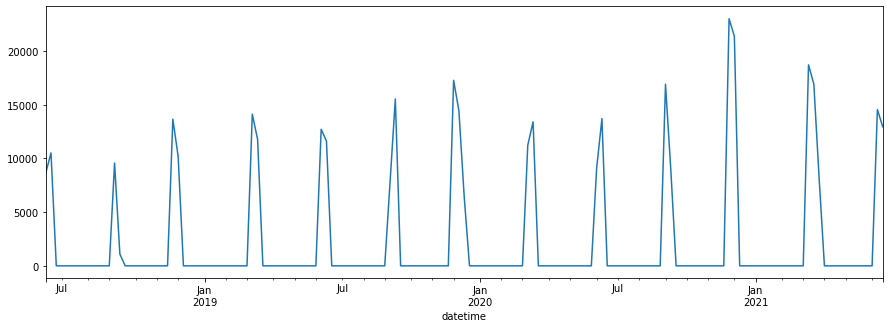

In [89]:
# Wann wurde abgestimmt? Decken sich die Peaks mit den Sessionsdaten? 
# (Im Jahr 2019: 4. – 13. März, 3. – 13. Juni, 2. – 12. September, 25. November – 10. Dezember 2019)
df.set_index('datetime').resample('W')['stimme'].count().plot(figsize=[15,5])

In [55]:
# Einige Stichproben.
df[df['date'] == pd.to_datetime('2020-09-02').date()]

,nachname,vorname,partei,datetime,geschäftsname,stimme,res_ja,res_nein,res_enthaltung,res_keine_stimme,anlage,dateiname,register,wohnort,wahlkreis,sprache,date
194337,NaN,NaN,SVP,2020-09-02 10:16:41,Motion: 4.Traktandum / Point de l’ordre du jou...,ja,151.0,1,0.0,8.0,bea1,03) Herbstsession 2020.xlsx,4,NaN,NaN,NaN,2020-09-02
194338,NaN,NaN,EVP,2020-09-02 10:17:22,Motion: 5.Traktandum / Point de l’ordre du jou...,ja,150.0,2,0.0,8.0,bea1,03) Herbstsession 2020.xlsx,5,NaN,NaN,NaN,2020-09-02
194339,NaN,NaN,SP,2020-09-02 10:18:02,Motion: 6.Traktandum / Point de l’ordre du jou...,ja,150.0,1,0.0,9.0,bea1,03) Herbstsession 2020.xlsx,6,NaN,NaN,NaN,2020-09-02
194340,NaN,NaN,Die Mitte,2020-09-02 10:18:41,Motion: 7.Traktandum / Point de l’ordre du jou...,ja,147.0,3,0.0,10.0,bea1,03) Herbstsession 2020.xlsx,7,NaN,NaN,NaN,2020-09-02
194341,NaN,NaN,SVP,2020-09-02 10:19:21,Motion: 8.Traktandum / Point de l’ordre du jou...,ja,115.0,35,1.0,9.0,bea1,03) Herbstsession 2020.xlsx,8,NaN,NaN,NaN,2020-09-02
194342,NaN,NaN,SP,2020-09-02 10:20:05,Motion: 9.Traktandum / Point de l’ordre du jou...,ja,53.0,97,0.0,10.0,bea1,03) Herbstsession 2020.xlsx,9,NaN,NaN,NaN,2020-09-02
194343,NaN,NaN,SVP,2020-09-02 10:20:52,Motion: 10.Traktandum / Point de l’ordre du jo...,ja,151.0,1,0.0,8.0,bea1,03) Herbstsession 2020.xlsx,10,NaN,NaN,NaN,2020-09-02
194344,NaN,NaN,Grüne,2020-09-02 11:05:54,Motion: 11.Traktandum / Point de l’ordre du jo...,ja,49.0,95,2.0,14.0,bea1,03) Herbstsession 2020.xlsx,11,NaN,NaN,NaN,2020-09-02
194345,NaN,NaN,SP,2020-09-02 11:06:34,Motion: 12.Traktandum / Point de l’ordre du jo...,ja,53.0,97,1.0,9.0,bea1,03) Herbstsession 2020.xlsx,12,NaN,NaN,NaN,2020-09-02
194346,NaN,NaN,Die Mitte,2020-09-02 11:07:12,Motion: 13.Traktandum / Point de l’ordre du jo...,ja,63.0,87,1.0,9.0,bea1,03) Herbstsession 2020.xlsx,13,NaN,NaN,NaN,2020-09-02


In [77]:
# Vergleichen der Resultate in den Rohdaten mit den selber errechneten. 
df_berechnung = df.groupby(by=['geschäftsname', 'dateiname', 'register'])['stimme'].value_counts().to_frame().unstack()
df_rohdaten = df.groupby(by=['geschäftsname', 'dateiname', 'register'])[['res_ja', 'res_nein', 'res_enthaltung', 'res_keine_stimme']].first()
df_test = pd.merge(df_berechnung, df_rohdaten, left_index=True, right_index=True)

2021-06-24 13:44:52,922 [28605] WARNING  py.warnings:109: [JupyterRequire] /home/this/.local/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)



In [87]:
df_test.iloc[678]

(stimme, abwesend)       13.0
(stimme, enthaltung)      1.0
(stimme, ja)             43.0
(stimme, nein)          100.0
res_ja                   43.0
res_nein                  101
res_enthaltung            1.0
res_keine_stimme          NaN
Name: (#2018.RRGR.549_7, Herbstsession 2019.xlsx, 10.09.2019), dtype: object